<a href="https://colab.research.google.com/github/ShKSGithub/Data-Analysis-with-Python/blob/main/Chapter_5/My_DA_Ch_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/MOOCs/Data Analysis with Python/Chapter_5/

/content/gdrive/MyDrive/Colab Notebooks/MOOCs/Data Analysis with Python/Chapter_5


# **Chapter 5**


## Topic 5.1
You'll convert data types, apply range constraints to remove future data points and remove duplicated data points to avoid double-counting.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ride_sharing = pd.read_csv('ride_sharing_new.csv')

# Print the information of ride_sharing
print('Information about ride sharing data frame:\n')
print(ride_sharing.info())

print('------------------------------------------------------------------------------')

# Print summary statistics of user_type column
print('Statistical Information about user type column in ride sharing data frame:\n',ride_sharing['user_type'].describe())

In [ ]:
# Strip duration of minutes
ride_sharing['minutes_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert minutes_trim to integer and assign to a new variable
ride_sharing['duration_time'] = ride_sharing['minutes_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration
print('Information of columns:\n',ride_sharing[['duration', 'minutes_trim', 'duration_time']])

print('------------------------------------------------------------------------------')

print('Mean of "duration_time" column:\n',ride_sharing.duration_time.mean())

In [ ]:
# Columns of ride sharing
ride_sharing.columns

In [ ]:
# Information of ride sharing
ride_sharing.info()

In [ ]:
# Statistical summary of ride sharing
ride_sharing.describe()

In [ ]:
# Convert user_type to integer
ride_sharing['user_type'] = ride_sharing['user_type'].astype('int')

# Set all values in ride sharing column of 'user_type' greater than 27 to 27
ride_sharing.loc[ride_sharing['user_type'] > 27, 'user_type'] = 27 

# Reconvert user_type back to categorical
'''
The category data type in pandas is a hybrid data type. 
It looks and behaves like a string in many instances but internally is represented by an array of integers
'''
ride_sharing['user_type'] = ride_sharing['user_type'].astype('category')

# Print user_type description
print('Description about user type column in ride sharing data frame:\n',ride_sharing['user_type'].describe())

In [ ]:
ride_sharing.info()

In [ ]:
# Convert ride_sharing[user_birth_year] to datetime
ride_sharing['user_birth_year'] = pd.to_datetime(ride_sharing['user_birth_year'])

# Import date time
import datetime as dt

# Save today's date
today = dt.datetime.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['user_birth_year'] > today , 'user_birth_year'] = today

# Print maximum of user_birth_year column
print('Maximum date:\n',ride_sharing.user_birth_year.max())

print('-' * 78)

print('Today:\n',today)

In [ ]:
# Find duplicates: duplicates
duplicates = ride_sharing.duplicated(subset= 'bike_id', keep= False)

# Sort your duplicated rides: duplicated_rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')

# Print relevant columns ['bike_id','duration','user_birth_year'] of duplicated_rides
print('Relevant Columns:\n', duplicated_rides[['bike_id','duration','user_birth_year']])

In [ ]:
# Drop complete duplicates from ride_sharing: ride_dup_trim
ride_dup_trim = ride_sharing.drop_duplicates()

# Group by ride_id and compute new statistics: ride_unique
ride_unique = ride_sharing.groupby('bike_id')

# Assert duplicates are processed
print('Data after Duplicate values removal:\n',ride_dup_trim)

# **Chapter 5**


## Topic 5.2
You’ll learn how to fix whitespace and capitalization inconsistencies in category labels, collapse multiple categories into one, and reformat strings for consistency.

In [ ]:
# Observation/record = row
# Target variable = column

# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read csv
airlines = pd.read_csv('airlines_final.csv')

In [ ]:
# Print categories DataFrame
print('Head of airlines data:\n',airlines.head())

In [ ]:
# Show information about dataframe
airlines.info() 

In [ ]:
# Columns in airlines
airlines.columns

In [ ]:
# Airlines id
airlines.id

In [ ]:
# Satisfaction column of airlines
airlines.satisfaction

In [ ]:
# Print unique values of Cleanliness in airlines
print('Unique values in "Cleanliness":\n', airlines['cleanliness'].unique(),'\n')
print('-'* 80)

# Print unique values of Safety in airlines
print('Unique values in "Safety": \n', airlines['safety'].unique(), '\n')
print('-'* 80)

# Print unique values of Satisfaction in airlines
print('Unique values in "Satisfaction": \n', airlines['satisfaction'].unique(), '\n')

In [ ]:
# Print unique values of dest_region column
print('Unique values of dest_region column:\n', airlines['dest_region'].unique(), '\n')

print('-'* 80, '\n')

# Print unique values of dest_size column
print('Unique values of dest_size column:\n', airlines['dest_size'].unique())

In [ ]:
# Create ranges for categories
label_ranges = [0,60, 180, np.inf]
label_names = ['short', 'medium', 'long']   # Short for 0-60 range , Medium for 61-180 range, long for 181-infinity range  

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins= label_ranges , labels= label_names,)  # Cut function can convert ranges into category

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday':'weekday', 'Thursday':'weekday',
            'Friday':'weekday', 'Saturday':'weekend', 'Sunday':'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [ ]:
# Replace "w" with "W"
airlines['day_week'] = airlines['day_week'].str.replace('w', 'W')

# Replace "e" with "E"
airlines['day_week'] = airlines['day_week'].str.replace('e', 'E')

# Replace "k" with "K"
airlines['day_week'] = airlines['day_week'].str.replace('k', 'K')

# Replace "day" with "DAY"
airlines['day_week'] = airlines['day_week'].str.replace('day', 'DAY')

# Assert that full_name has no honorifics
assert airlines['day_week'].str.contains('w|e|k|day').any() == False  

In [ ]:
# Check either characters replaced or not?
airlines.day_week

In [ ]:
# Store length of each row (characters) in survey_response column
surv_resp_length = airlines['day_week'].str.len()  

# Find rows in airlines where surv_resp_length > 4
airlines_survey = airlines[surv_resp_length > 4]

# Assert minimum day_week length is > 5
assert airlines_survey['day_week'].str.len().min() > 5

# Print new survey_response column
print(airlines_survey['day_week'].head(),':\n','-'*80)

# **Chapter 5**


## Topic 5.3
You’ll dive into more advanced data cleaning problems,
such as ensuring that weights are all written in kilograms instead of pounds.

In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

banking = pd.read_csv('banking_dirty.csv')

# Columns of banking
banking.columns

Index(['Unnamed: 0', 'cust_id', 'birth_date', 'Age', 'acct_amount',
       'inv_amount', 'fund_A', 'fund_B', 'fund_C', 'fund_D', 'account_opened',
       'last_transaction'],
      dtype='object')

In [ ]:
# Find values of acct_amount that are equal to '38175.46'
acct_eu = banking['acct_amount'] == 38175.46

# Find values of inv_amount that are equal to '15050'
acct_inv = banking['inv_amount'] == 15050

# Convert acct_eu where it is in euro to dollars
# The .loc[] method takes in two arguments, the first one being to select rows, and the second to select columns.
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_inv, 'inv_amount'] * 10

# Unify acct_eu column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'inv_amount'] = 'dollars'

# Assert unique values of acct_amount where it is equal to dollar
# assert banking['acct_amount'].unique() == 'dollar'

In [ ]:
# Head of Banking 
display(banking.head())

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,150500.00,dollars,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [ ]:
# Print the header of account_opened
print(banking.account_opened.head())

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


In [ ]:
# Store fund columns to sum against
fund_columns = ['fund_A','fund_B','fund_C','fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equal = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equal]
inconsistent_inv = banking[~ inv_equal]

# Display inconsistent data
print("Number of inconsistent investments:", inconsistent_inv.shape[0], '\n', '-' * 80)

# Display Consistent data
print("Number of Consistent investments:", consistent_inv.shape[0])

Number of inconsistent investments: 9 
 --------------------------------------------------------------------------------
Number of Consistent investments: 91


Sum of all missing values:
 Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


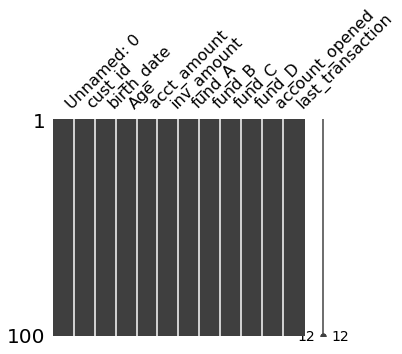

In [ ]:
import missingno as msno

# Print number of missing values in banking
print('Sum of all missing values:\n',banking.isna().sum())

# Visualize distribution of missing values as a matrix
msno.matrix(banking, figsize=(5,4))
plt.show()

In [ ]:
# Drop missing values of column "cust_id" in the dataframe
banking_fullid = banking.dropna(subset=['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print('All missing values in each column:\n',banking_imputed.isna().sum())

All missing values in each column:
 Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64
